# Toggle Time Tracking
markdown-pdf is needed for PDF Report: https://www.npmjs.com/package/markdown-pdf

```npm install -g markdown-pdf```

## Setup

### Import sub-modules

In [1]:
import base_functions
from base_functions import *

3


In [2]:
%load_ext watermark
%watermark -a "Silvan Zahno" -d -v -iv -m -h

watermark  2.0.2
plotly     4.5.4
numpy      1.18.1
pandas     1.0.1
pytz       2019.3
certifi    2020.04.05.1
re         2.2.1
matplotlib 3.1.3
seaborn    0.10.0
json       2.0.9
Silvan Zahno 2020-05-01 

CPython 3.7.6
IPython 7.12.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores  : 8
interpreter: 64bit
host name  : zell


### Configuration

In [3]:
# Setup local input directories
inputDir = data_inputDir + os.sep
createDir(inputDir)

In [4]:
# Setup local input directories
outputDir = data_outputDir + os.sep
md_subdir = "md" + os.sep
data_subdir = "data" + os.sep
graph_subdir = "graph" + os.sep
createDir(os.path.realpath(outputDir))
createDir(os.path.realpath(outputDir + md_subdir))
createDir(os.path.realpath(outputDir + data_subdir))
createDir(os.path.realpath(outputDir + md_subdir + graph_subdir))

## Data Import

In [5]:
print(os.getcwd())
with open("toggl_credentials.json", "r") as file:
  credentials = json.load(file)
  toggl_cr = credentials['toggl']
  APIKEY = toggl_cr['APIKEY']
   
toggl = Toggl()
toggl.setAPIKey(APIKEY)

c:\work\repo\my\jupyter_notebook\04_HEVS\toggl


### Get toggle information

In [6]:
toggl_time_entries_url = "https://www.toggl.com/api/v8/time_entries"
toggl_user_url = "https://www.toggl.com/api/v8/me"
toggl_workspaces_url = "https://www.toggl.com/api/v8/workspaces"
toggl_clients_url = "https://www.toggl.com/api/v8/clients"

### User Info

In [7]:
user = pd.DataFrame.from_dict(toggl.request(toggl_user_url))
if verbose >= 2:
  display(user)

,since,data
achievements_enabled,1588320028,True
api_token,1588320028,28b59df81f3ad452c14b78e563287f77
at,1588320028,2020-04-20T05:15:03+00:00
beginning_of_week,1588320028,1
created_at,1588320028,2016-10-23T11:00:17+00:00
date_format,1588320028,DD.MM.YYYY
default_wid,1588320028,1721871
duration_format,1588320028,improved
email,1588320028,whynotlogic@gmail.com
fullname,1588320028,Whynotlogic


### Workspaces Info

In [8]:
workspaces_list = pd.DataFrame.from_dict(toggl.request(toggl_workspaces_url))
if verbose >= 2:
  display(workspaces_list)

,id,name,profile,premium,admin,default_hourly_rate,default_currency,only_admins_may_create_projects,only_admins_see_billable_rates,only_admins_see_team_dashboard,projects_billable_by_default,rounding,rounding_minutes,api_token,at,ical_enabled
0,1721871,Whynotlogic's workspace,0,False,True,0,USD,False,False,False,True,1,0,9e62c09c28d5823983a9a8e025b8fc72,2016-10-23T11:00:18+00:00,True


In [9]:
workspaces_list = pd.DataFrame.from_dict(toggl.request(toggl_workspaces_url))
workspaces_list

workspaces = pd.DataFrame()
for wid in workspaces_list['id']:
  workspaces = pd.DataFrame.from_dict(toggl.request(toggl_workspaces_url + "/" + str(wid) + "/clients"))
if verbose >= 2:
  display(workspaces)

,id,wid,name,at
0,43922486,1721871,Constellium,2019-03-06T18:56:23+00:00
1,43922487,1721871,HESSO,2019-03-06T18:56:27+00:00
2,43922490,1721871,MAS,2019-03-06T18:56:37+00:00
3,46299137,1721871,BFO,2019-12-16T18:37:25+00:00


### User Client Info

In [10]:
user_clients = pd.DataFrame.from_dict(toggl.request(toggl_clients_url))
if verbose >= 2:
  display(user_clients)

,id,wid,name,at
0,46299137,1721871,BFO,2019-12-16T18:37:25+00:00
1,43922486,1721871,Constellium,2019-03-06T18:56:23+00:00
2,43922487,1721871,HESSO,2019-03-06T18:56:27+00:00
3,43922490,1721871,MAS,2019-03-06T18:56:37+00:00


### Projects Info

In [11]:
projects = pd.DataFrame()
for i in list(range(0, len(workspaces_list))):
  projects_list = toggl.request(toggl_workspaces_url + "/" + str(workspaces_list['id'][i]) + "/projects")
  projects_df_temp = pd.DataFrame.from_dict(projects_list)
  projects = pd.concat([projects_df_temp, projects])
if verbose >= 2:
  display(projects)

,id,wid,cid,name,billable,is_private,active,template,at,created_at,color,auto_estimates,actual_hours,hex_color
0,150034131,1721871,43922487,Admin,False,True,True,False,2019-03-14T15:21:47+00:00,2019-03-06T18:57:53+00:00,2,False,96.0,#ea468d
1,150235579,1721871,43922486,Admin,False,True,True,False,2019-03-14T11:07:28+00:00,2019-03-14T11:06:35+00:00,5,False,41.0,#4bc800
2,150242002,1721871,43922487,Apero Creation,False,True,True,False,2019-03-21T15:01:49+00:00,2019-03-14T15:21:39+00:00,2,False,19.0,#ea468d
3,150954300,1721871,43922486,ASI - DPP,False,True,True,False,2020-04-20T05:35:35+00:00,2019-04-11T07:34:25+00:00,0,False,266.0,#06aaf5
4,159863425,1721871,43922486,AT - DALU,False,True,True,False,2020-04-20T05:35:43+00:00,2020-04-14T08:05:22+00:00,0,False,5.0,#06aaf5
5,150366067,1721871,43922486,AT - USP,False,True,True,False,2020-04-20T05:35:51+00:00,2019-03-20T16:31:46+00:00,0,False,263.0,#06aaf5
6,159687602,1721871,43922487,Bachelorthesis,False,True,True,False,2020-04-08T06:29:18+00:00,2020-04-08T06:29:18+00:00,2,False,11.0,#ea468d
7,151295149,1721871,43922487,Compensation,False,True,True,False,2019-04-30T06:42:23+00:00,2019-04-30T06:42:17+00:00,11,False,405.0,#205500
8,151205285,1721871,43922487,Holidays,False,True,True,False,2019-04-24T15:14:28+00:00,2019-04-24T15:14:16+00:00,9,False,240.0,#a01aa5
9,155957551,1721871,46299137,Informatik Experte,False,True,True,False,2019-12-16T18:37:52+00:00,2019-12-16T18:37:52+00:00,8,False,6.0,#3750b5


## Analytics

In [36]:
verbose = 2
# -1 = previous (month|week)
# 0 = current (month|week)
#monthReports = [0]
monthReports = [-2]
#weekReports = range(0, -4, -1) #  0 .. -3
weekReports = range(-1, -5, -1) # -1 .. -4

#onthReports = range(0, -20, -1)
#weekReports = range(-60, -90, -1)

generateMonthlyReport = True
generateWeeklyReport = True
generateAllReports = False # Keep to false of Notebook crashes after a while
fetching_future_days = 30

#### Get all time entries

In [37]:
date1 = dateOnly(getJoinDate(user))
date2 = dateOnly(getTodayDate() + datetime.timedelta(days=fetching_future_days))
timeEntriesDf = togglTimelogExtractor(toggl, toggl_time_entries_url, date1, date2)
timeEntriesDf = fillCleanTimeentries(timeEntriesDf, projects, user_clients)

saveDfCsv(timeEntriesDf, "zas-timerecords", outputDir + data_subdir)

if verbose >= 2:
  display(timeEntriesDf)    

  * DataFrame save to out\data\2020-05-01-zas-timerecords.csv


,client,project,description,start,stop,duration
0,Constellium,Smart Process Lab,Visit Constellium Site in Steg,2019-02-27 08:00:00+00:00,2019-02-27 12:00:00+00:00,04:00:00
1,Constellium,Smart Process Lab,CoPil Meeting with Constellium,2019-03-01 08:00:00+00:00,2019-03-01 13:30:00+00:00,05:30:00
2,MAS,SEPM5,Literature Internet of Things for Architects,2019-03-04 05:00:00+00:00,2019-03-04 10:30:00+00:00,05:30:00
3,HESSO,Admin,"Administrative Stuff, Laptop Password, Login w...",2019-03-04 08:00:00+00:00,2019-03-04 12:07:00+00:00,04:07:00
4,MAS,SEPM5,Literature Internet of Things for Architects,2019-03-05 05:36:00+00:00,2019-03-05 06:00:00+00:00,00:24:00
...,...,...,...,...,...,...
646,Constellium,AT - DALU,Kickoff DigitaAlu,2020-04-30 12:25:47+00:00,2020-04-30 12:25:47+00:00,00:00:00
647,HESSO,Compensation,Compensation,2020-05-01 06:00:00+00:00,2020-05-01 14:00:00+00:00,08:00:00
648,HESSO,Unterricht spez. Aufgaben,Sem Labo,2020-05-04 05:00:00+00:00,2020-05-04 10:00:00+00:00,05:00:00
649,Constellium,Project Aquisition,P3 Project,2020-05-04 11:00:00+00:00,2020-05-04 14:00:00+00:00,03:00:00


### Monthly

2020-03-01 00:00:00.761232 -> 2020-03-31 23:59:59.761232
|   Parameter | Unique Values | Total Rows | 
|-------------|---------------|------------|
|      client |             2 |         42 | 
|     project |             9 |         42 | 
| description |            26 |         42 | 
|       start |            42 |         42 | 
|        stop |            42 |         42 | 
|    duration |             8 |         42 | 


c:\work\repo\my\jupyter_notebook\04_HEVS\toggl\base_functions.py:233: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



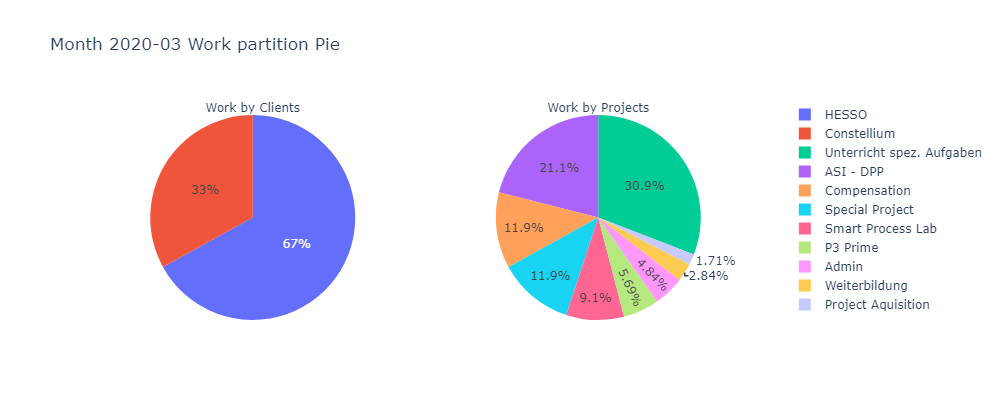

c:\work\repo\my\jupyter_notebook\04_HEVS\toggl\base_functions.py:151: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



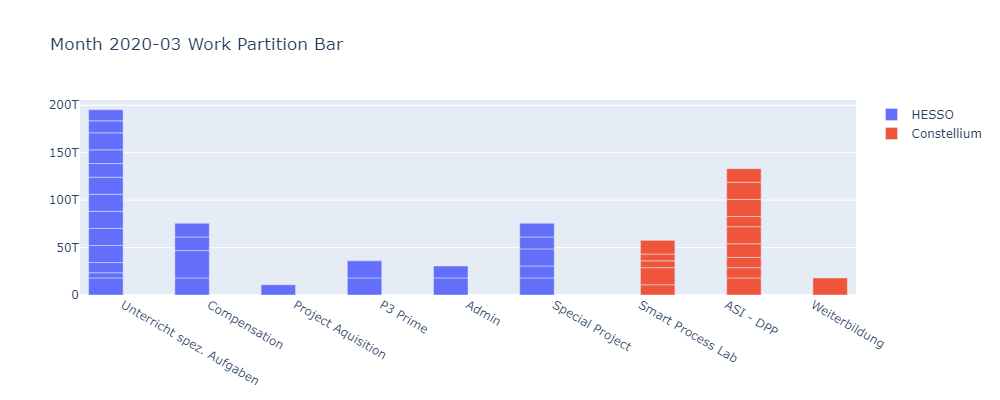

# Month 2020-03 Report

## Monthly Working Hours per Clients and Project

Timeframe: 01-03-2020 => 31-03-2020
### Client HESSO

| Project | Time |
| ------- | ---- |
| Admin | 8.50 |
| Compensation | 21.00 |
| P3 Prime | 10.00 |
| Project Aquisition | 3.00 |
| Special Project | 21.00 |
| Unterricht spez. Aufgaben | 54.25 |

### Client Constellium

| Project | Time |
| ------- | ---- |
| ASI - DPP | 37.0 |
| Smart Process Lab | 16.0 |
| Weiterbildung | 5.0 |

![Month 2020-03 Work partition Pie](.\graph\Month_2020-03_Work_partition_Pie.svg)

![Month 2020-03 Work Partition Bar](.\graph\Month_2020-03_Work_Partition_Bar.svg)


markdown-pdf Month_2020-03_Report.md
  * PDF Report Month_2020-03_Report.pdf generated


In [38]:
if generateMonthlyReport:
  for month in monthReports:
    monthlyreportFilePath = monthlyReport(timeEntriesDf, month, outputDir, md_subdir, graph_subdir, plotlySettings)
    generateReport(monthlyreportFilePath, outputDir)

### Weekly

|   Parameter | Unique Values | Total Rows | 
|-------------|---------------|------------|
|      client |             3 |         13 | 
|     project |             5 |         13 | 
| description |             9 |         13 | 
|       start |            13 |         13 | 
|        stop |            13 |         13 | 
|    duration |            12 |         13 | 


c:\work\repo\my\jupyter_notebook\04_HEVS\toggl\base_functions.py:269: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



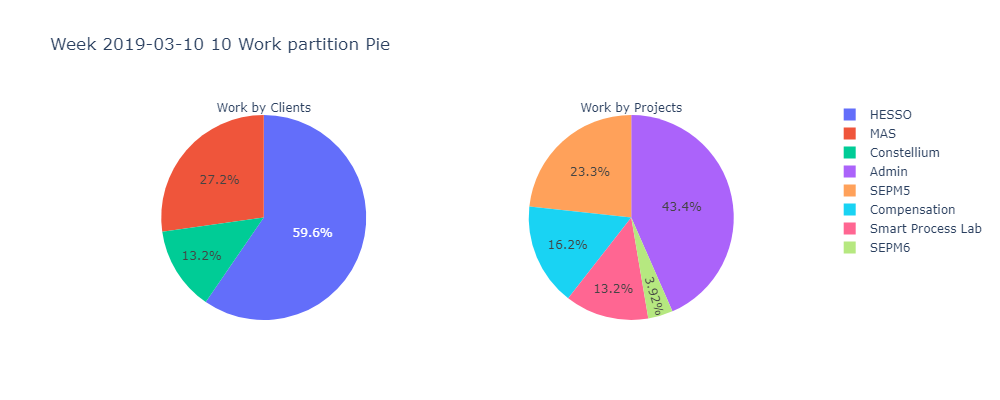

c:\work\repo\my\jupyter_notebook\04_HEVS\toggl\base_functions.py:151: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



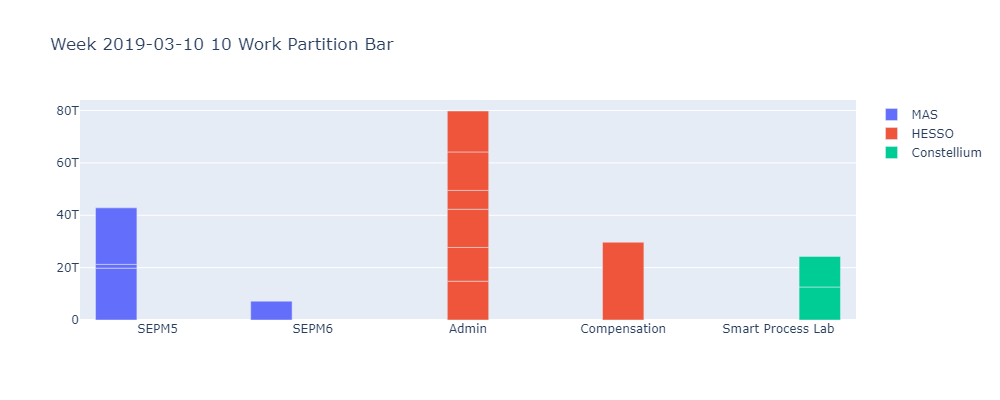

# Week 2019-03-10 10 Report

## Weekly Working Hours per Clients and Project

Week Number: 10
Timeframe: 04-03-2019 => 10-03-2019
### Client MAS

| Project | Time |
| ------- | ---- |
| SEPM5 | 11.899444 |
| SEPM6 | 2.000000 |

### Client HESSO

| Project | Time |
| ------- | ---- |
| Admin | 22.175833 |
| Compensation | 8.250000 |

### Client Constellium

| Project | Time |
| ------- | ---- |
| Smart Process Lab | 6.75 |

![Week 2019-03-10 10 Work partition Pie](.\graph\Week_2019-03-10_10_Work_partition_Pie.svg)

![Week 2019-03-10 10 Work Partition Bar](.\graph\Week_2019-03-10_10_Work_Partition_Bar.svg)


markdown-pdf Week_2019-03-10_10_Report.md
  * PDF Report Week_2019-03-10_10_Report.pdf generated
|   Parameter | Unique Values | Total Rows | 
|-------------|---------------|------------|
|      client |             1 |          2 | 
|     project |             1 |          2 | 
| description |             2 |          2 | 
|       start |             2 |          2 | 
|        stop 

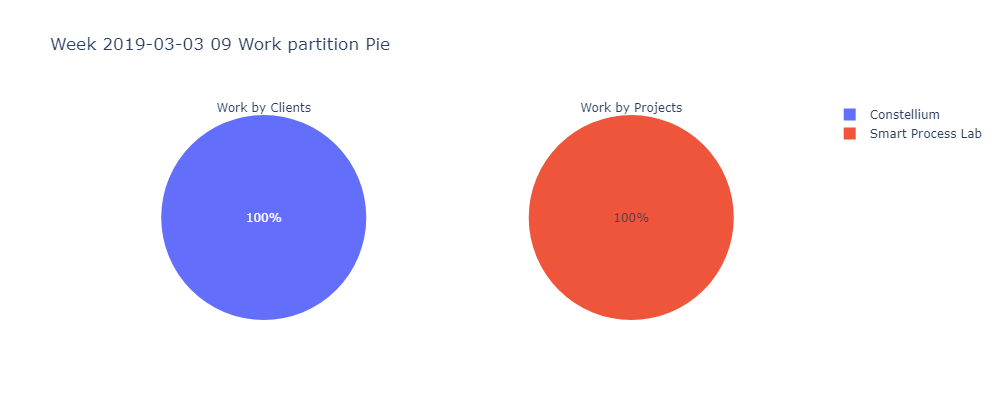

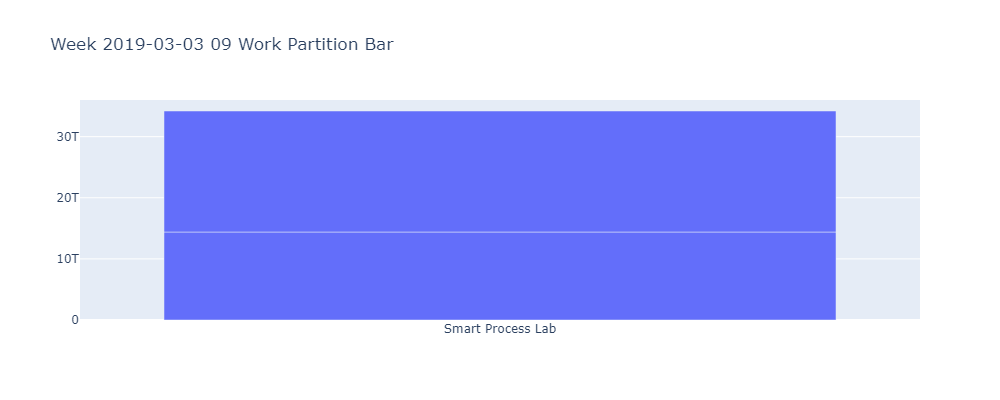

# Week 2019-03-03 09 Report

## Weekly Working Hours per Clients and Project

Week Number: 09
Timeframe: 25-02-2019 => 03-03-2019
### Client Constellium

| Project | Time |
| ------- | ---- |
| Smart Process Lab | 9.5 |

![Week 2019-03-03 09 Work partition Pie](.\graph\Week_2019-03-03_09_Work_partition_Pie.svg)

![Week 2019-03-03 09 Work Partition Bar](.\graph\Week_2019-03-03_09_Work_Partition_Bar.svg)


markdown-pdf Week_2019-03-03_09_Report.md
  * PDF Report Week_2019-03-03_09_Report.pdf generated
|   Parameter | Unique Values | Total Rows | 
|-------------|---------------|------------|
|      client |             0 |          0 | 
|     project |             0 |          0 | 
| description |             0 |          0 | 
|       start |             0 |          0 | 
|        stop |             0 |          0 | 
|    duration |             0 |          0 | 


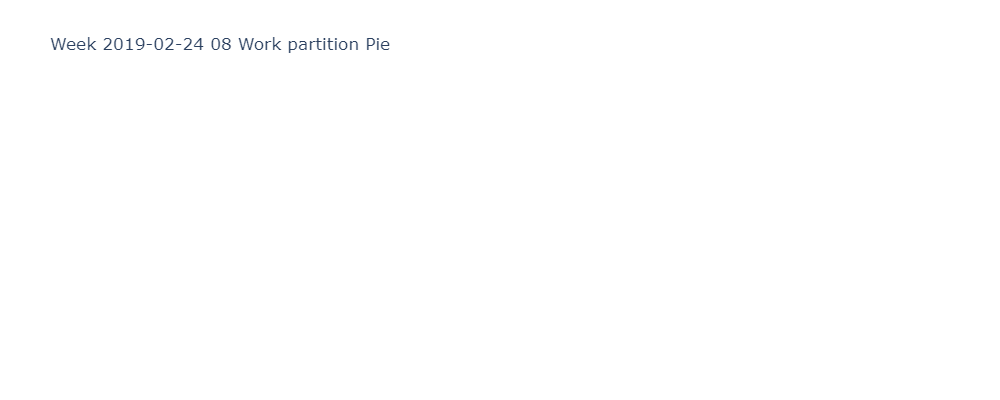

IndexError: list index out of range

In [24]:
if generateWeeklyReport:
    for week in weekReports:
        weeklyreportFilePath = weeklyReport(timeEntriesDf, week, outputDir, md_subdir, graph_subdir, plotlySettings)
        generateReport(weeklyreportFilePath, outputDir)

## Generate All PDF Reports

In [16]:
if generateAllReports:
  
  for addMonth in range(0, -5, -1):
    monthlyreportFilePath = monthlyReport(timeEntriesDf, addMonth, outputDir, md_subdir, graph_subdir)
    generateReport(monthlyreportFilePath, outputDir)
        
  for addWeek in range(0, -31, -1):
    weeklyreportFilePath = weeklyReport(timeEntriesDf, addWeek, outputDir, md_subdir, graph_subdir)
    generateReport(weeklyreportFilePath, outputDir)
        
  generateAllReports(outputDir + md_subdir, outputDir)